# BEN JACKANY CAPSTONE PROJECT
## FLIGHT DELAYS PREDICTIONS

![fig_06](img/fig_06.png)


### MACHINE LEARNING MODELS ( LOGISTIC - BALANCED DATASET)

### Libraries

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from imblearn.over_sampling import SMOTE

In [50]:
df = pd.read_csv('../Data/dfm.csv')

In [51]:
df

,FLIGHT_STATUS,DISTANCE,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_ABQ,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ANC,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_COS,ORIGIN_CRW,ORIGIN_CVG,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_GEG,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_HDN,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_ILM,ORIGIN_IND,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MLB,ORIGIN_MOB,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBN,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TYS,ORIGIN_VPS,ORIGIN_XNA,ORIGIN_STATE_ABR_AL,ORIGIN_STATE_ABR_AR,ORIGIN_STATE_ABR_AZ,ORIGIN_STATE_ABR_CA,ORIGIN_STATE_ABR_CO,ORIGIN_STATE_ABR_CT,ORIGIN_STATE_ABR_FL,ORIGIN_STATE_ABR_GA,ORIGIN_STATE_ABR_HI,ORIGIN_STATE_ABR_IA,ORIGIN_STATE_ABR_ID,ORIGIN_STATE_ABR_IL,ORIGIN_STATE_ABR_IN,ORIGIN_STATE_ABR_KS,ORIGIN_STATE_ABR_KY,ORIGIN_STATE_ABR_LA,ORIGIN_STATE_ABR_MA,ORIGIN_STATE_ABR_MD,ORIGIN_STATE_ABR_ME,ORIGIN_STATE_ABR_MI,ORIGIN_STATE_ABR_MN,ORIGIN_STATE_ABR_MO,ORIGIN_STATE_ABR_MS,ORIGIN_STATE_ABR_MT,ORIGIN_STATE_ABR_NC,ORIGIN_STATE_ABR_ND,ORIGIN_STATE_ABR_NE,ORIGIN_STATE_ABR_NH,ORIGIN_STATE_ABR_NJ,ORIGIN_STATE_ABR_NM,ORIGIN_STATE_ABR_NV,ORIGIN_STATE_ABR_NY,ORIGIN_STATE_ABR_OH,ORIGIN_STATE_ABR_OK,ORIGIN_STATE_ABR_OR,ORIGIN_STATE_ABR_PA,ORIGIN_STATE_ABR_PR,ORIGIN_STATE_ABR_RI,ORIGIN_STATE_ABR_SC,ORIGIN_STATE_ABR_SD,ORIGIN_STATE_ABR_TN,ORIGIN_STATE_ABR_TX,ORIGIN_STATE_ABR_UT,ORIGIN_STATE_ABR_VA,ORIGIN_STATE_ABR_VI,ORIGIN_STATE_ABR_VT,ORIGIN_STATE_ABR_WA,ORIGIN_STATE_ABR_WI,ORIGIN_STATE_ABR_WV,ORIGIN_STATE_ABR_WY,DEST_BOS,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_FLL,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_RDU,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,DEST_STATE_ABR_CO,DEST_STATE_ABR_FL,DEST_STATE_ABR_GA,DEST_STATE_ABR_IL,DEST_STATE_ABR_MA,DEST_STATE_ABR_MI,DEST_STATE_ABR_MN,DEST_STATE_ABR_NC,DEST_STATE_ABR_NV,DEST_STATE_ABR_NY,DEST_STATE_ABR_TX,DEST_STATE_ABR_UT,DEST_STATE_ABR_VA,DEST_STATE_ABR_WA
0,0.0,1020.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,214.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [56]:
X = df.drop(columns ='FLIGHT_STATUS')

In [57]:
X

,DISTANCE,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_ABQ,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ANC,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_COS,ORIGIN_CRW,ORIGIN_CVG,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_GEG,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_HDN,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_ILM,ORIGIN_IND,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MLB,ORIGIN_MOB,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBN,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TYS,ORIGIN_VPS,ORIGIN_XNA,ORIGIN_STATE_ABR_AL,ORIGIN_STATE_ABR_AR,ORIGIN_STATE_ABR_AZ,ORIGIN_STATE_ABR_CA,ORIGIN_STATE_ABR_CO,ORIGIN_STATE_ABR_CT,ORIGIN_STATE_ABR_FL,ORIGIN_STATE_ABR_GA,ORIGIN_STATE_ABR_HI,ORIGIN_STATE_ABR_IA,ORIGIN_STATE_ABR_ID,ORIGIN_STATE_ABR_IL,ORIGIN_STATE_ABR_IN,ORIGIN_STATE_ABR_KS,ORIGIN_STATE_ABR_KY,ORIGIN_STATE_ABR_LA,ORIGIN_STATE_ABR_MA,ORIGIN_STATE_ABR_MD,ORIGIN_STATE_ABR_ME,ORIGIN_STATE_ABR_MI,ORIGIN_STATE_ABR_MN,ORIGIN_STATE_ABR_MO,ORIGIN_STATE_ABR_MS,ORIGIN_STATE_ABR_MT,ORIGIN_STATE_ABR_NC,ORIGIN_STATE_ABR_ND,ORIGIN_STATE_ABR_NE,ORIGIN_STATE_ABR_NH,ORIGIN_STATE_ABR_NJ,ORIGIN_STATE_ABR_NM,ORIGIN_STATE_ABR_NV,ORIGIN_STATE_ABR_NY,ORIGIN_STATE_ABR_OH,ORIGIN_STATE_ABR_OK,ORIGIN_STATE_ABR_OR,ORIGIN_STATE_ABR_PA,ORIGIN_STATE_ABR_PR,ORIGIN_STATE_ABR_RI,ORIGIN_STATE_ABR_SC,ORIGIN_STATE_ABR_SD,ORIGIN_STATE_ABR_TN,ORIGIN_STATE_ABR_TX,ORIGIN_STATE_ABR_UT,ORIGIN_STATE_ABR_VA,ORIGIN_STATE_ABR_VI,ORIGIN_STATE_ABR_VT,ORIGIN_STATE_ABR_WA,ORIGIN_STATE_ABR_WI,ORIGIN_STATE_ABR_WV,ORIGIN_STATE_ABR_WY,DEST_BOS,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_FLL,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_RDU,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,DEST_STATE_ABR_CO,DEST_STATE_ABR_FL,DEST_STATE_ABR_GA,DEST_STATE_ABR_IL,DEST_STATE_ABR_MA,DEST_STATE_ABR_MI,DEST_STATE_ABR_MN,DEST_STATE_ABR_NC,DEST_STATE_ABR_NV,DEST_STATE_ABR_NY,DEST_STATE_ABR_TX,DEST_STATE_ABR_UT,DEST_STATE_ABR_VA,DEST_STATE_ABR_WA
0,1020.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [58]:
y = df['FLIGHT_STATUS']

In [59]:
X.shape

(697697, 254)

In [60]:
y.shape

(697697,)

In [62]:
from sklearn.dummy import DummyClassifier

In [63]:
frequent_clf = DummyClassifier(strategy= 'most_frequent').fit(X_train, y_train)

In [66]:
frequent_clf.score(X_test, y_test)

0.499484577290265

In [64]:
y_freq_pred = frequent_clf.predict(X_test)

In [82]:
confusion_matrix(y_test, y_freq_pred)

array([[     0, 118957],
       [     0, 118712]])

In [79]:
print(classification_report(y_test, y_freq_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    118957
         1.0       0.50      1.00      0.67    118712

    accuracy                           0.50    237669
   macro avg       0.25      0.50      0.33    237669
weighted avg       0.25      0.50      0.33    237669



/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
uniform_clf = DummyClassifier(strategy= 'uniform').fit(X_train, y_train)

In [70]:
uniform_clf.score(X_test, y_test)

0.5006079884208711

In [80]:
y_uniform_pred = uniform_clf.predict(X_test)

In [81]:
print(classification_report(y_test, y_uniform_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50    118957
         1.0       0.50      0.50      0.50    118712

    accuracy                           0.50    237669
   macro avg       0.50      0.50      0.50    237669
weighted avg       0.50      0.50      0.50    237669



In [71]:
stratified_clf = DummyClassifier(strategy= 'stratified').fit(X_train, y_train)

In [72]:
y_strat_pred = stratified_clf.predict(X_test)

In [73]:
stratified_clf.score(X_test, y_test)

0.5004186494662746

In [76]:
confusion_matrix(y_test, y_pred)

array([[77866, 41091],
       [44805, 73907]])

In [77]:
print(classification_report(y_test,y_strat_pred ))

              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50    118957
         1.0       0.50      0.50      0.50    118712

    accuracy                           0.50    237669
   macro avg       0.50      0.50      0.50    237669
weighted avg       0.50      0.50      0.50    237669



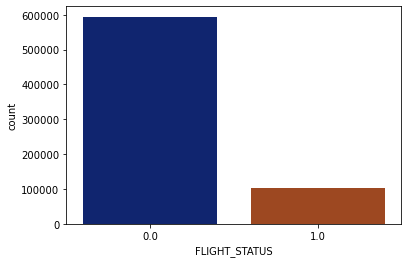

In [61]:
sns.countplot(x="FLIGHT_STATUS", palette="dark", data= df);

In [11]:
ontime = df[df['FLIGHT_STATUS'] ==0 ]
delayed = df[df['FLIGHT_STATUS'] ==1 ]

In [12]:
print(ontime.shape,delayed.shape )

(594172, 255) (103525, 255)


In [13]:
df['FLIGHT_STATUS'].value_counts(normalize= True)

0.0    0.851619
1.0    0.148381
Name: FLIGHT_STATUS, dtype: float64

In [14]:
oversample = SMOTE()

In [15]:
X, y = oversample.fit_resample(X, y)

In [16]:
X.shape

(1188344, 254)

In [17]:
y.shape

(1188344,)

In [74]:
accuracy_score(y_test, y_pred)

0.6385898034661651

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64    118957
         1.0       0.64      0.62      0.63    118712

    accuracy                           0.64    237669
   macro avg       0.64      0.64      0.64    237669
weighted avg       0.64      0.64      0.64    237669



### LOGISTIC REGRESSION ( BALANCED DATASET)

![fig_09](img/fig_09.png)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= .2,  random_state=42)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)

In [21]:
scaled_X_test = scaler.transform(X_test)

In [22]:
logReg = LogisticRegression()

In [23]:
logReg.fit(scaled_X_train, y_train)

LogisticRegression()

In [24]:
#examine train and test scores
print(f'The training score is {logReg.score(X_train, y_train)}')
print(f'The testing score is {logReg.score(X_test, y_test)}')

The training score is 0.499871144187025
The testing score is 0.5005154227097349


In [25]:
logReg.coef_

array([[-0.04359926, -0.33681787, -0.40306367, -0.3024222 , -0.21974906,
        -0.37416442, -0.33347494, -0.35218584, -0.21483863, -0.23790922,
        -0.28006711, -0.40223992, -0.33815215, -0.2785685 , -0.23439384,
        -0.2577038 , -0.28121013, -0.28251618, -0.08698964, -0.076037  ,
        -0.10593515, -0.21779487, -0.5409885 , -0.07186025, -0.30794078,
        -0.05312939, -0.01207295, -0.15167346, -0.11818217, -0.23062693,
        -0.0551576 , -0.20712313, -0.08570958, -0.28160155, -0.0295152 ,
        -0.03635883, -0.12909126, -0.07860664, -0.18258643, -0.27510346,
        -0.28808471, -0.04764403, -0.05980523, -0.05463131, -0.43224161,
        -0.03947076, -0.1343789 , -0.19070389, -0.14869121, -0.04085162,
        -0.04863591, -0.20424104, -0.09770988, -0.13438302, -0.08412522,
        -0.19371294, -0.23637674, -0.3085186 , -0.07264511, -0.40205162,
        -0.10842703, -0.02632328, -0.10951103, -0.15411683, -0.08632771,
        -0.09417726, -0.05519562, -0.05124565, -0.1

In [26]:
df.head()

,FLIGHT_STATUS,DISTANCE,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_ABQ,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ANC,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_COS,ORIGIN_CRW,ORIGIN_CVG,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_GEG,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_HDN,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_ILM,ORIGIN_IND,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MLB,ORIGIN_MOB,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBN,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TYS,ORIGIN_VPS,ORIGIN_XNA,ORIGIN_STATE_ABR_AL,ORIGIN_STATE_ABR_AR,ORIGIN_STATE_ABR_AZ,ORIGIN_STATE_ABR_CA,ORIGIN_STATE_ABR_CO,ORIGIN_STATE_ABR_CT,ORIGIN_STATE_ABR_FL,ORIGIN_STATE_ABR_GA,ORIGIN_STATE_ABR_HI,ORIGIN_STATE_ABR_IA,ORIGIN_STATE_ABR_ID,ORIGIN_STATE_ABR_IL,ORIGIN_STATE_ABR_IN,ORIGIN_STATE_ABR_KS,ORIGIN_STATE_ABR_KY,ORIGIN_STATE_ABR_LA,ORIGIN_STATE_ABR_MA,ORIGIN_STATE_ABR_MD,ORIGIN_STATE_ABR_ME,ORIGIN_STATE_ABR_MI,ORIGIN_STATE_ABR_MN,ORIGIN_STATE_ABR_MO,ORIGIN_STATE_ABR_MS,ORIGIN_STATE_ABR_MT,ORIGIN_STATE_ABR_NC,ORIGIN_STATE_ABR_ND,ORIGIN_STATE_ABR_NE,ORIGIN_STATE_ABR_NH,ORIGIN_STATE_ABR_NJ,ORIGIN_STATE_ABR_NM,ORIGIN_STATE_ABR_NV,ORIGIN_STATE_ABR_NY,ORIGIN_STATE_ABR_OH,ORIGIN_STATE_ABR_OK,ORIGIN_STATE_ABR_OR,ORIGIN_STATE_ABR_PA,ORIGIN_STATE_ABR_PR,ORIGIN_STATE_ABR_RI,ORIGIN_STATE_ABR_SC,ORIGIN_STATE_ABR_SD,ORIGIN_STATE_ABR_TN,ORIGIN_STATE_ABR_TX,ORIGIN_STATE_ABR_UT,ORIGIN_STATE_ABR_VA,ORIGIN_STATE_ABR_VI,ORIGIN_STATE_ABR_VT,ORIGIN_STATE_ABR_WA,ORIGIN_STATE_ABR_WI,ORIGIN_STATE_ABR_WV,ORIGIN_STATE_ABR_WY,DEST_BOS,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_FLL,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_RDU,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,DEST_STATE_ABR_CO,DEST_STATE_ABR_FL,DEST_STATE_ABR_GA,DEST_STATE_ABR_IL,DEST_STATE_ABR_MA,DEST_STATE_ABR_MI,DEST_STATE_ABR_MN,DEST_STATE_ABR_NC,DEST_STATE_ABR_NV,DEST_STATE_ABR_NY,DEST_STATE_ABR_TX,DEST_STATE_ABR_UT,DEST_STATE_ABR_VA,DEST_STATE_ABR_WA
0,0.0,1020.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,214.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
y_pred = logReg.predict(scaled_X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.6385898034661651

In [30]:
confusion_matrix(y_test, y_pred)

array([[77866, 41091],
       [44805, 73907]])

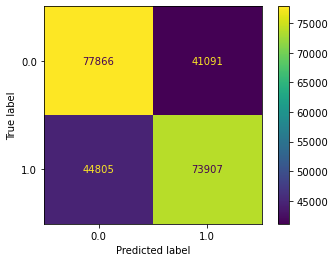

In [31]:
plot_confusion_matrix(logReg, scaled_X_test, y_test);

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64    118957
         1.0       0.64      0.62      0.63    118712

    accuracy                           0.64    237669
   macro avg       0.64      0.64      0.64    237669
weighted avg       0.64      0.64      0.64    237669



In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision_score(y_test, y_pred)

0.6426807422737787

In [35]:
recall_score(y_test, y_pred)

0.6225739605094683

In [36]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

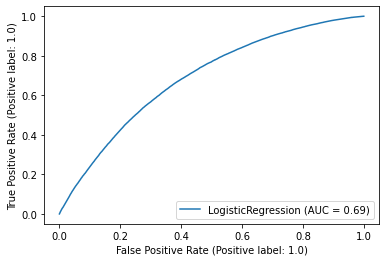

In [37]:
plot_roc_curve(logReg, scaled_X_test, y_test);

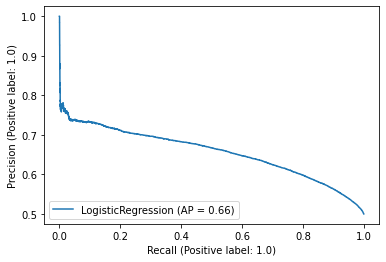

In [38]:
plot_precision_recall_curve(logReg,scaled_X_test, y_test);